pip install

*   geopandas and its prerequisite
*   us: where we download the shapefile


In [ ]:
!pip install datalab

     |████████████████████████████████| 1.4 MB 9.5 MB/s 
     |████████████████████████████████| 138 kB 61.4 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-1.4.0-py2.py3-none-any.whl size=24033 sha256=79bc84698305d1eb056eb77eefc08d9425e28e078999a57a33e5e498de21954e
  Stored in directory: /root/.cache/pip/wheels/99/1b/22/fd21454e83092576a63d092a437c8415cb531d116c2552e19d
Successfully built pandas-profiling
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,947 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:13 http

In [ ]:
pip install us

     |████████████████████████████████| 132 kB 8.4 MB/s 
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11945 sha256=26297542e73ba472cf1d60f0730daab1c8fa38a31eff440f6169eeba648312ee
  Stored in directory: /root/.cache/pip/wheels/ca/6b/11/cda9ea2438f721330a35c9a2c8e34b4aedcd34c89af48a4d00
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72182 sha256=7f649033eae744e45b8bf74903fffc6d1c3d433aa6cf580cb1080b96e765189b
  Stored in directory: /root/.cache/pip/wheels/a1/99/51/7de469e37cd1b3c763c24394e1ebf1baa2d79e094bf346cf80
Successfully built us jellyfish


Import python packages

In [ ]:
pip install Geopandas

     |████████████████████████████████| 1.0 MB 10.7 MB/s 
     |████████████████████████████████| 6.3 MB 63.2 MB/s 
     |████████████████████████████████| 16.7 MB 379 kB/s 


In [ ]:
from google.cloud import bigquery
from google.colab import auth

import IPython
import datetime
import numpy as np
import pandas as pd

import geopandas as gpd
import shapely
from shapely import wkt
import requests
import zipfile
import io

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium

%matplotlib inline
plt.rcParams['figure.figsize'] = [12,10]

import us

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
_ = auth.authenticate_user()

In [ ]:
# declaring which project you want to work with
client = bigquery.Client(project = 'yilina-career-project')

In [ ]:
job_config = bigquery.QueryJobConfig()

In [ ]:
job_config.use_legacy_sql = False

#Chicago Crime Analysis:

###Chicago Crime public data (information below can be found in google bigquery public datasets):


Dataset Source: City of Chicago

Category: Chicago, Public Safety

Use: This dataset is publicly available for anyone to use under the following terms provided by the Dataset Source —https://data.cityofchicago.org — and is provided "AS IS" without any warranty, express or implied, from Google. Google disclaims all liability for any damages, direct or indirect, resulting from the use of the dataset.

Use: This dataset is publicly available for anyone to use under the following terms provided by the Dataset Source —https://data.cityofchicago.org — and is provided "AS IS" without any warranty, express or implied, from Google. Google disclaims all liability for any damages, direct or indirect, resulting from the use of the dataset.

Update Frequency: Daily

### Time frame:
1. The time range we are going to look at mainly are 2011-01-01 ~ 2020-12-31, 10 years of data in total
2. We also would take a closer look into the year 2020 itself














In [ ]:
SQL_category_counts = """select distinct primary_type, count(*) as count
from `bigquery-public-data.chicago_crime.crime`
where (date BETWEEN '2011-01-01'AND '2020-12-31') and (longitude is not null and latitude is not null)
group by primary_type
order by count desc"""

In [ ]:
categories = client.query(SQL_category_counts).to_dataframe()

In [ ]:
categories

,primary_type,count
0,THEFT,630706
1,BATTERY,511684
2,CRIMINAL DAMAGE,299219
3,NARCOTICS,218451
4,ASSAULT,189238
5,OTHER OFFENSE,170050
6,DECEPTIVE PRACTICE,156742
7,BURGLARY,152247
8,MOTOR VEHICLE THEFT,119716
9,ROBBERY,108032


###Picking out the crime categories of interest:
After having a glance at the table above, I decided to look into 2 types of crimes to help understand the nature of those two in chicago:

####Kidnapping
####Human Trafficking
####Questions:
what are the trends in the number of cases reported for those types of crimes in those two categories over the years?
where do those crimes normally happen, which zipcpode/district/location? etc.

In [ ]:
categories = categories[categories.primary_type.isin(['KIDNAPPING', 'HUMAN TRAFFICKING'])]
categories

,primary_type,count
23,KIDNAPPING,2005
30,HUMAN TRAFFICKING,65


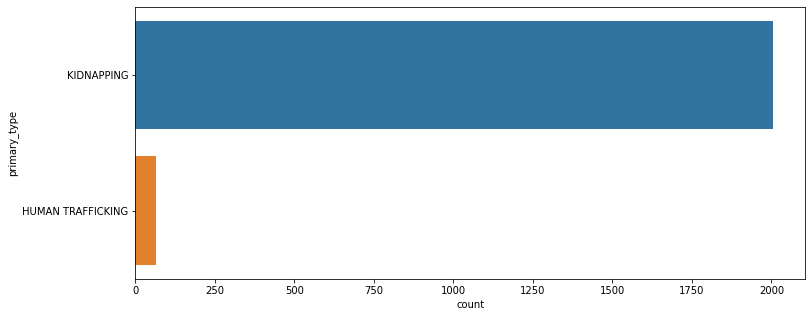

In [ ]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x='count', y='primary_type', data=categories)

Number of reported incidents & arrests over the years for each category

In [ ]:
sql_count_specific_crimes_per_year = """
select distinct primary_type, extract(YEAR from date) AS year, 
count(*) as count, 
sum(CASE WHEN arrest THEN 1 ELSE 0 END) as arrest_sum, 
sum(CASE WHEN domestic THEN 1 ELSE 0 END) as domestic_sum, 
from `bigquery-public-data.chicago_crime.crime`
where (date BETWEEN '2011-01-01'AND '2020-12-31') 
and (longitude is not null and latitude is not null)
and primary_type in ('KIDNAPPING', 'HUMAN TRAFFICKING')
group by primary_type, year
order by count desc
"""

In [ ]:
bar_chart_year_count = client.query(sql_count_specific_crimes_per_year).to_dataframe()
bar_chart_year_count.head()

,primary_type,year,count,arrest_sum,domestic_sum
0,KIDNAPPING,2011,265,31,58
1,KIDNAPPING,2013,242,34,78
2,KIDNAPPING,2012,235,21,65
3,KIDNAPPING,2014,220,18,52
4,KIDNAPPING,2016,202,15,69


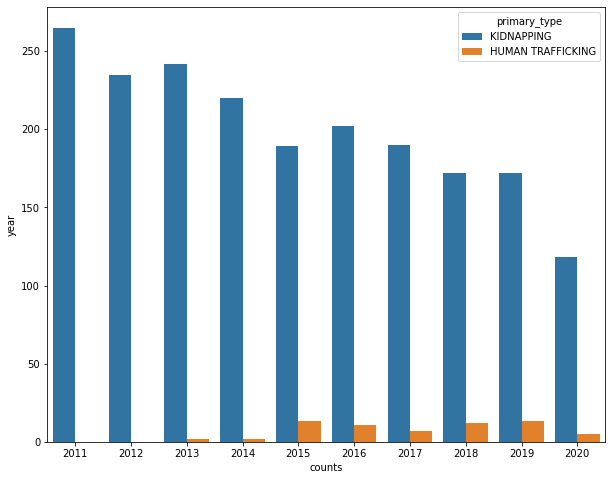

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x="year", 
            y="count", 
            hue="primary_type", 
            data=bar_chart_year_count,
            ci=None)
plt.ylabel("year")
plt.xlabel("counts")
plt.show()

In [ ]:
bar_chart_year_count["arrest_sum_pctg"] = bar_chart_year_count["arrest_sum"]/bar_chart_year_count["count"]
bar_chart_year_count["domestic_sum_pctg"] = bar_chart_year_count["domestic_sum"]/bar_chart_year_count["count"]
bar_chart_year_count.head(20)

,primary_type,year,count,arrest_sum,domestic_sum,arrest_sum_pctg,domestic_sum_pctg
0,KIDNAPPING,2011,265,31,58,0.116981,0.218868
1,KIDNAPPING,2013,242,34,78,0.140496,0.322314
2,KIDNAPPING,2012,235,21,65,0.089362,0.276596
3,KIDNAPPING,2014,220,18,52,0.081818,0.236364
4,KIDNAPPING,2016,202,15,69,0.074257,0.341584
5,KIDNAPPING,2017,190,17,53,0.089474,0.278947
6,KIDNAPPING,2015,189,15,61,0.079365,0.322751
7,KIDNAPPING,2018,172,8,41,0.046512,0.238372
8,KIDNAPPING,2019,172,12,36,0.069767,0.209302
9,KIDNAPPING,2020,118,10,43,0.084746,0.364407


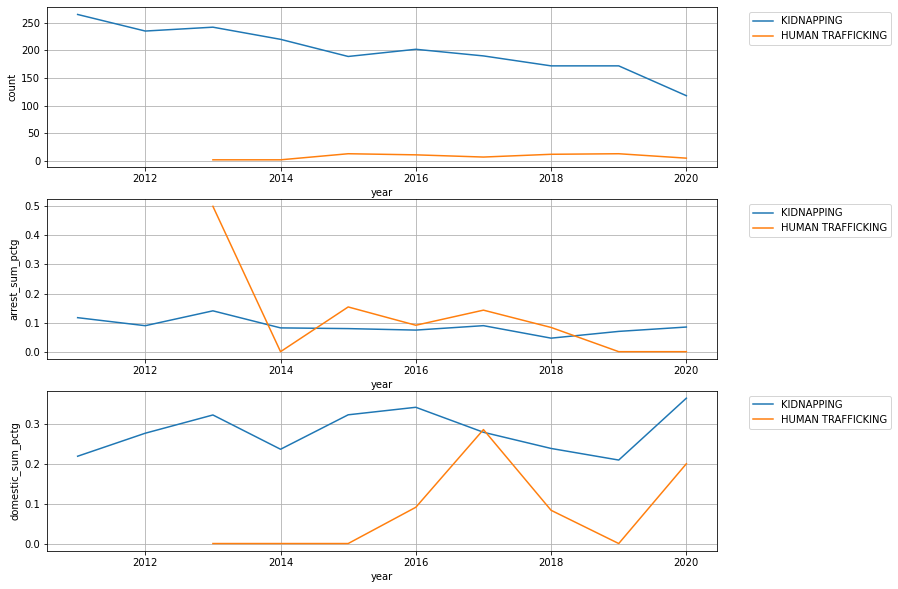

In [ ]:
# to prevent reptitive code, making a custom function for lineplots
def subplot_y_range(dim, y_list):
  for i in range(1, dim[0]+1):
    plt.subplot(dim[0], dim[1], i)
    sns.lineplot(data=bar_chart_year_count, x="year", y= y_list[i-1], hue = bar_chart_year_count.primary_type, ci = None)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.grid()

subplot_y_range((3,1), ['count', 'arrest_sum_pctg', 'domestic_sum_pctg'])

###Our main Chicago Crime Data

In [ ]:
SQL_chicago = """
select primary_type, unique_key, date, location_description, arrest, domestic, latitude, longitude, ST_GeogPoint(longitude, latitude) as Point, 
block, district, ward, community_area
from `bigquery-public-data.chicago_crime.crime`
where longitude is not null and latitude is not null
and primary_type in ('KIDNAPPING', 'HUMAN TRAFFICKING')
and date between '2011-01-01'AND '2020-12-31'
"""

In [ ]:
chicago_crime = client.query(SQL_chicago).to_dataframe()
chicago_crime.head(5)

,primary_type,unique_key,date,location_description,arrest,domestic,latitude,longitude,Point,block,district,ward,community_area
0,KIDNAPPING,9800632,2014-09-30 04:20:00+00:00,ALLEY,False,False,41.689529,-87.532868,POINT(-87.532867745 41.689528966),113XX S AVENUE H,4,10,52.0
1,KIDNAPPING,8650891,2012-06-09 10:00:00+00:00,RESIDENCE,False,True,41.703662,-87.717145,POINT(-87.71714521 41.703661931),104XX S AVERS AVE,22,19,74.0
2,KIDNAPPING,9375684,2013-11-03 03:00:00+00:00,RESIDENCE,False,True,41.703662,-87.717145,POINT(-87.71714521 41.703661931),104XX S AVERS AVE,22,19,74.0
3,KIDNAPPING,7955724,2011-03-03 07:30:00+00:00,STREET,False,False,41.732717,-87.580472,POINT(-87.580472409 41.732716952),089XX S CREGIER AVE,4,8,48.0
4,KIDNAPPING,10892151,2017-03-21 03:30:00+00:00,SIDEWALK,False,False,41.807290,-87.733359,POINT(-87.733359471 41.807290478),047XX S KOSTNER AVE,8,14,57.0


chicago 2020 weekly count reported incident of crime

In [ ]:
chicago_lineplot_2020 = chicago_crime[['primary_type', 'date']][chicago_crime.date > '2020-01-01'].groupby('primary_type').resample('W',on='date').count().drop('primary_type', axis = 1).rename(columns={'date':'counts'})
chicago_lineplot_2020

counts
primary_type      date                             
HUMAN TRAFFICKING 2020-02-16 00:00:00+00:00       1
                  2020-02-23 00:00:00+00:00       0
                  2020-03-01 00:00:00+00:00       1
                  2020-03-08 00:00:00+00:00       0
                  2020-03-15 00:00:00+00:00       0
...                                             ...
KIDNAPPING        2020-11-29 00:00:00+00:00       1
                  2020-12-06 00:00:00+00:00       2
                  2020-12-13 00:00:00+00:00       1
                  2020-12-20 00:00:00+00:00       2
                  2020-12-27 00:00:00+00:00       1

[84 rows x 1 columns]

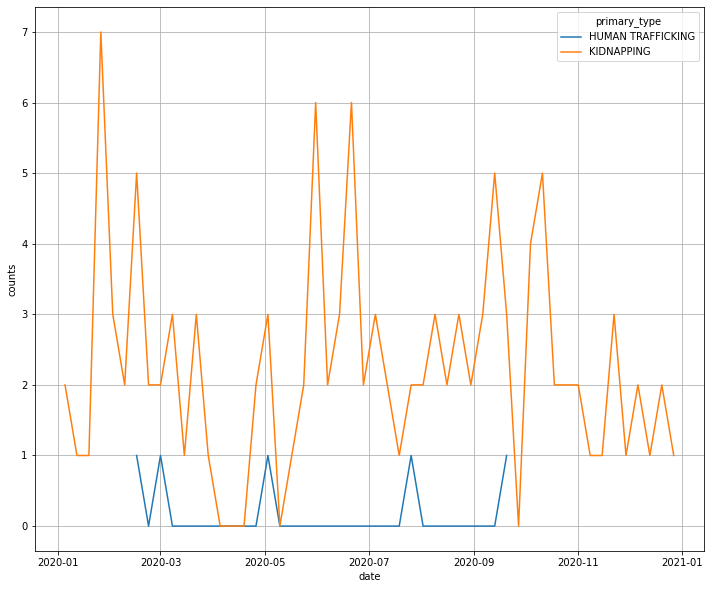

In [ ]:
sns.lineplot(x = chicago_lineplot_2020.index.get_level_values(1), y = 'counts', data = chicago_lineplot_2020, hue = chicago_lineplot_2020.index.get_level_values(0))
plt.grid()

### decomposing 10 years of time series data, aggregated monthly

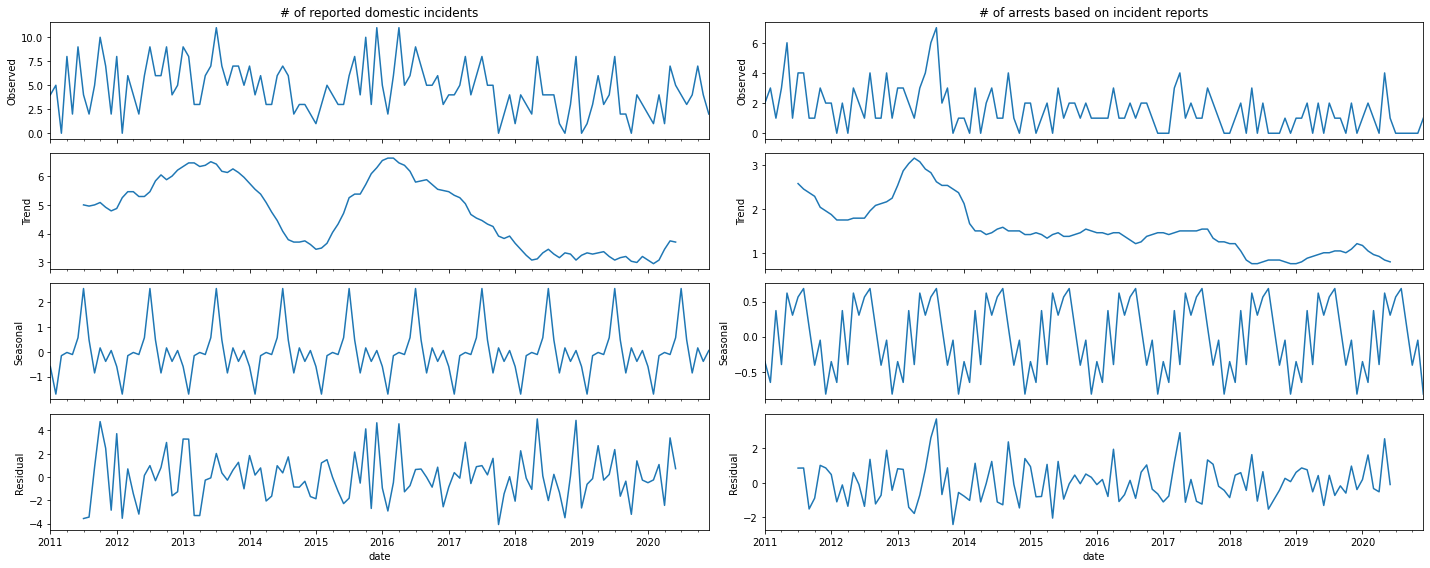

In [ ]:
domestic = sm.tsa.seasonal_decompose(chicago_crime.resample('M', on='date').sum()['domestic'], model='additive')
arrest = sm.tsa.seasonal_decompose(chicago_crime.resample('M', on='date').sum()['arrest'], model='additive')

def plot_decomposition(df, axes, set_title = ''):
    df.observed.plot(ax=axes[0], legend=False)
    axes[0].set_ylabel('Observed')
    df.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    df.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    df.resid.plot(ax=axes[3], legend=False)
    axes[3].set_ylabel('Residual')
    axes[0].set_title(set_title)

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(20,8))

plot_decomposition(domestic, axes[:,0], set_title = '# of reported domestic incidents')
plot_decomposition(arrest, axes[:,1], set_title = '# of arrests based on incident reports')

plt.tight_layout()
plt.show()


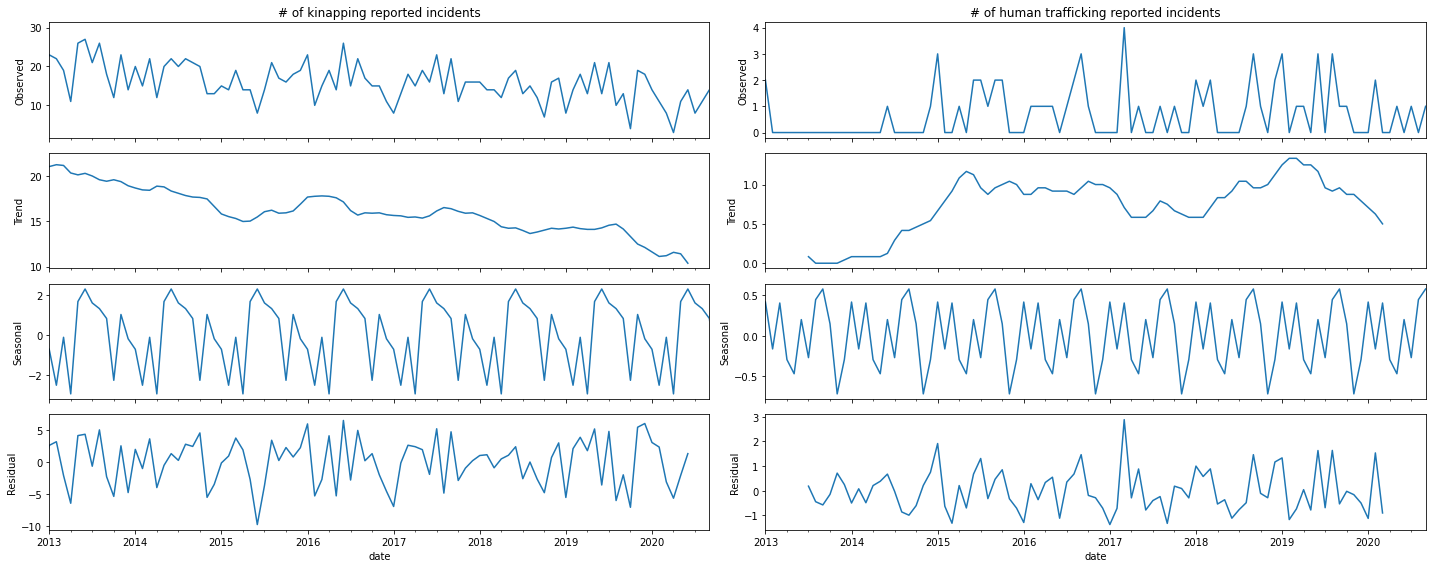

In [ ]:
s_cat = sm.tsa.seasonal_decompose(chicago_crime[chicago_crime.primary_type == 'KIDNAPPING'].resample('M', on='date').count()['unique_key'], model='additive')
c_cat = sm.tsa.seasonal_decompose(chicago_crime[chicago_crime.primary_type == 'HUMAN TRAFFICKING'].resample('M', on='date').count()['unique_key'], model='additive')

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(20,8))
plot_decomposition(s_cat, axes[:,0], set_title = '# of kinapping reported incidents')
plot_decomposition(c_cat, axes[:,1], set_title = '# of human trafficking reported incidents')
plt.tight_layout()
plt.show()

### map visualization

#### getting geopandas dataframe

In [ ]:
chicago_crime.head()

,primary_type,unique_key,date,location_description,arrest,domestic,latitude,longitude,Point,block,district,ward,community_area
0,KIDNAPPING,9800632,2014-09-30 04:20:00+00:00,ALLEY,False,False,41.689529,-87.532868,POINT(-87.532867745 41.689528966),113XX S AVENUE H,4,10,52.0
1,KIDNAPPING,8650891,2012-06-09 10:00:00+00:00,RESIDENCE,False,True,41.703662,-87.717145,POINT(-87.71714521 41.703661931),104XX S AVERS AVE,22,19,74.0
2,KIDNAPPING,9375684,2013-11-03 03:00:00+00:00,RESIDENCE,False,True,41.703662,-87.717145,POINT(-87.71714521 41.703661931),104XX S AVERS AVE,22,19,74.0
3,KIDNAPPING,7955724,2011-03-03 07:30:00+00:00,STREET,False,False,41.732717,-87.580472,POINT(-87.580472409 41.732716952),089XX S CREGIER AVE,4,8,48.0
4,KIDNAPPING,10892151,2017-03-21 03:30:00+00:00,SIDEWALK,False,False,41.807290,-87.733359,POINT(-87.733359471 41.807290478),047XX S KOSTNER AVE,8,14,57.0


In [ ]:
# geopandas (reference: geopandas documentation https://geopandas.org/index.html)
# GeoPandas is an open source python library to make working with geospatial data in python easier. 
# GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. 
# Geometric operations are performed by shapely, which is a python package for manipulation and analysis of planar geometric objects.
# Geopandas further depends on matplotlib for plotting.

# wkt.load helps make our data's geometry column recognizable by deserializing a column of string type data into geography objects
# geopandas also have the points_from_xy() to transform longitude and latitude into shapely geography objects
chicago_crime['Point'] = chicago_crime['Point'].apply(wkt.loads)
chicago_crime_geo = gpd.GeoDataFrame(chicago_crime, geometry='Point')

In [ ]:
# getting just a subset for folium interactive map
folium_viz_subset = chicago_crime_geo[chicago_crime_geo.date > '2020-01-01']
folium_viz_subset

,primary_type,unique_key,date,location_description,arrest,domestic,latitude,longitude,Point,block,district,ward,community_area
12,HUMAN TRAFFICKING,12214097,2020-05-01 12:01:00+00:00,APARTMENT,False,True,41.983067,-87.709515,POINT (-87.70952 41.98307),032XX W BRYN MAWR AVE,17,39,13.0
14,KIDNAPPING,12078846,2020-06-15 03:00:00+00:00,STREET,False,False,41.743970,-87.585797,POINT (-87.58580 41.74397),083XX S STONY ISLAND AVE,4,8,45.0
16,KIDNAPPING,12036747,2020-04-24 04:59:00+00:00,RESIDENCE,False,True,41.698122,-87.526998,POINT (-87.52700 41.69812),108XX S AVENUE C,4,10,52.0
26,KIDNAPPING,12224029,2020-11-17 03:35:00+00:00,SIDEWALK,False,False,41.937194,-87.799811,POINT (-87.79981 41.93719),069XX W FLETCHER ST,25,36,18.0
31,KIDNAPPING,12256302,2020-12-17 10:00:00+00:00,APARTMENT,False,False,41.742470,-87.579116,POINT (-87.57912 41.74247),018XX E 84TH ST,4,8,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,KIDNAPPING,11987579,2020-02-21 10:00:00+00:00,RESIDENCE,False,False,41.754839,-87.685416,POINT (-87.68542 41.75484),076XX S CAMPBELL AVE,8,18,70.0
2028,KIDNAPPING,12157077,2020-09-05 02:15:00+00:00,RESIDENCE,False,False,41.748744,-87.734968,POINT (-87.73497 41.74874),045XX W 79TH PL,8,18,70.0
2030,KIDNAPPING,12190239,2020-10-10 10:00:00+00:00,RESIDENCE,False,False,41.747433,-87.679246,POINT (-87.67925 41.74743),022XX W 80TH PL,8,18,70.0
2063,KIDNAPPING,12227212,2020-11-21 04:00:00+00:00,STREET,False,True,41.692042,-87.649667,POINT (-87.64967 41.69204),111XX S ABERDEEN ST,22,34,75.0


In [ ]:
folium_viz_subset_geo = gpd.GeoDataFrame(folium_viz_subset, geometry='Point')

In [ ]:
type(folium_viz_subset_geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
folium_viz_subset_geo.geometry

12      POINT (-87.70952 41.98307)
14      POINT (-87.58580 41.74397)
16      POINT (-87.52700 41.69812)
26      POINT (-87.79981 41.93719)
31      POINT (-87.57912 41.74247)
                   ...            
2027    POINT (-87.68542 41.75484)
2028    POINT (-87.73497 41.74874)
2030    POINT (-87.67925 41.74743)
2063    POINT (-87.64967 41.69204)
2066    POINT (-87.67307 41.67864)
Name: Point, Length: 123, dtype: geometry

#### visualizing the exact location points
NOTE: due to computational limitation, first two visualizations are using a subset of data (date > 2020-01-01)

In [ ]:
# folium is a python library that is often used to help generate maps with an extra layer of data representation and visualization. 
# It combines the data analytics capabilities of Python and the mapping strengths of leaflet.js.
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [ ]:
m = folium.Map(location=[41.792668,-87.724376],
                      zoom_start=13, tiles='cartodbpositron')

oc_feature = folium.FeatureGroup(name='kinapping')
soa_feature = folium.FeatureGroup(name='human trafficking')
  

for i, v in folium_viz_subset.iterrows():
    popup = """
    unique_key : <b>%s</b><br>
    location_description : <b>%s</b><br>
    arrest : <b>%s</b><br>
    domestic : <b>%d</b><br>
    """ % (v['unique_key'], v['location_description'], v['arrest'], v['domestic'])
    
    if v['primary_type'] == 'KIDNAPPING':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(oc_feature)
    elif v['primary_type'] == 'HUMAN TRAFFICKING':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=1,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(soa_feature)

oc_feature.add_to(m)
soa_feature.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)

In [ ]:
m

In [ ]:
marker_cluster = MarkerCluster().add_to(m)
m_cluster = folium.Map(location=[41.792668,-87.724376],
                      zoom_start=13, tiles='cartodbpositron')
oc_feature = folium.FeatureGroup(name='kinapping')
soa_feature = folium.FeatureGroup(name='human trafficking')
   

for i, v in folium_viz_subset.iterrows():
    popup = """
    unique_key : <b>%s</b><br>
    location_description : <b>%s</b><br>
    arrest : <b>%s</b><br>
    domestic : <b>%d</b><br>
    """ % (v['unique_key'], v['location_description'], v['arrest'], v['domestic'])
    
    if v['primary_type'] == 'KIDNAPPING':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#FFBA00',
                            fill_color='#FFBA00',
                            fill=True).add_to(marker_cluster)
    elif v['primary_type'] == 'HUMAN TRAFFICKING':
        folium.CircleMarker(location=[v['latitude'], v['longitude']],
                            radius=3,
                            tooltip=popup,
                            color='#087FBF',
                            fill_color='#087FBF',
                            fill=True).add_to(marker_cluster)

m_cluster.add_child(marker_cluster)


#### visualizing using chorepleth graph 

In [ ]:
SQL_chicago_zipcode = """
SELECT zip_code, city, zip_code_geom
FROM `bigquery-public-data.geo_us_boundaries.zip_codes` 
WHERE state_code = 'IL'
"""

In [ ]:
zipcode = client.query(SQL_chicago_zipcode).to_dataframe()
zipcode.head()


,zip_code,city,zip_code_geom
0,62092,White Hall city,"POLYGON((-90.526413 39.421632, -90.526422 39.4..."
1,61449,La Fayette village,"POLYGON((-90.039998 41.071064, -90.040017 41.0..."
2,62359,Paloma,"POLYGON((-91.223934 40.021838, -91.223924 40.0..."
3,62650,"Woodson village, Jacksonville city, Lynnville ...","POLYGON((-90.43782 39.714377, -90.437834 39.71..."
4,61469,Oquawka village,"POLYGON((-91.01324 40.896622, -91.013899 40.89..."


In [ ]:
zipcode['zip_code_geom'] = zipcode['zip_code_geom'].apply(wkt.loads)
zipcode_geo = gpd.GeoDataFrame(zipcode, geometry='zip_code_geom')

# spatial join
# the sequence of listing two dataframes that are to be spatial joined is important, because only the geometry object that is going to be left after the spatial join is the geometry object from the first dataframe 
chicago_crime_zip = gpd.sjoin(folium_viz_subset_geo, zipcode_geo)

In [ ]:
chicago_crime_zip.head(5)

,primary_type,unique_key,date,location_description,arrest,domestic,latitude,longitude,Point,block,district,ward,community_area,index_right,zip_code,city
12,HUMAN TRAFFICKING,12214097,2020-05-01 12:01:00+00:00,APARTMENT,False,True,41.983067,-87.709515,POINT (-87.70952 41.98307),032XX W BRYN MAWR AVE,17,39,13.0,1340,60659,Chicago city
66,KIDNAPPING,12133363,2020-08-02 09:00:00+00:00,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,41.997589,-87.697951,POINT (-87.69795 41.99759),027XX W DEVON AVE,24,50,2.0,1340,60659,Chicago city
14,KIDNAPPING,12078846,2020-06-15 03:00:00+00:00,STREET,False,False,41.743970,-87.585797,POINT (-87.58580 41.74397),083XX S STONY ISLAND AVE,4,8,45.0,1381,60617,Chicago city
16,KIDNAPPING,12036747,2020-04-24 04:59:00+00:00,RESIDENCE,False,True,41.698122,-87.526998,POINT (-87.52700 41.69812),108XX S AVENUE C,4,10,52.0,1381,60617,Chicago city
31,KIDNAPPING,12256302,2020-12-17 10:00:00+00:00,APARTMENT,False,False,41.742470,-87.579116,POINT (-87.57912 41.74247),018XX E 84TH ST,4,8,45.0,1381,60617,Chicago city


In [ ]:
count_zip = chicago_crime_zip.groupby(['zip_code', 'primary_type'])['unique_key'].nunique().reset_index()
count_zip

,zip_code,primary_type,unique_key
0,60606,KIDNAPPING,1
1,60608,KIDNAPPING,2
2,60609,KIDNAPPING,3
3,60610,HUMAN TRAFFICKING,1
4,60612,KIDNAPPING,1
5,60614,KIDNAPPING,2
6,60615,KIDNAPPING,4
7,60616,KIDNAPPING,4
8,60617,KIDNAPPING,7
9,60618,KIDNAPPING,1


In [ ]:
count_zip_geom = pd.merge(left = count_zip, 
         right = zipcode_geo[['zip_code', 'zip_code_geom']],
         how = 'inner',
         left_on = 'zip_code',
         right_on = 'zip_code').drop_duplicates()

count_zip_geom

,zip_code,primary_type,unique_key,zip_code_geom
0,60606,KIDNAPPING,1,"POLYGON ((-87.64138 41.88863, -87.64137 41.888..."
1,60608,KIDNAPPING,2,"POLYGON ((-87.70291 41.83258, -87.70305 41.832..."
2,60609,KIDNAPPING,3,"POLYGON ((-87.68731 41.82841, -87.68730 41.828..."
3,60610,HUMAN TRAFFICKING,1,"POLYGON ((-87.64828 41.91139, -87.64828 41.911..."
4,60612,KIDNAPPING,1,"POLYGON ((-87.70847 41.87548, -87.70846 41.875..."
5,60614,KIDNAPPING,2,"MULTIPOLYGON (((-87.67770 41.92004, -87.67770 ..."
6,60615,KIDNAPPING,4,"POLYGON ((-87.62603 41.80742, -87.62602 41.807..."
7,60616,KIDNAPPING,4,"MULTIPOLYGON (((-87.64651 41.84773, -87.64651 ..."
8,60617,KIDNAPPING,7,"POLYGON ((-87.58745 41.72327, -87.58742 41.723..."
9,60618,KIDNAPPING,1,"POLYGON ((-87.72783 41.96095, -87.72782 41.960..."


In [ ]:
count_zip_geom_point = pd.merge(left = count_zip_geom, 
         right = chicago_crime_zip[['zip_code', 'Point']],
         how = 'inner',
         left_on = 'zip_code',
         right_on = 'zip_code').drop_duplicates()

count_zip_geom_point

,zip_code,primary_type,unique_key,zip_code_geom,Point
0,60606,KIDNAPPING,1,"POLYGON ((-87.64138 41.88863, -87.64137 41.888...",POINT (-87.63959 41.87893)
1,60608,KIDNAPPING,2,"POLYGON ((-87.70291 41.83258, -87.70305 41.832...",POINT (-87.66578 41.83887)
2,60608,KIDNAPPING,2,"POLYGON ((-87.70291 41.83258, -87.70305 41.832...",POINT (-87.65361 41.83929)
3,60609,KIDNAPPING,3,"POLYGON ((-87.68731 41.82841, -87.68730 41.828...",POINT (-87.62641 41.82467)
4,60609,KIDNAPPING,3,"POLYGON ((-87.68731 41.82841, -87.68730 41.828...",POINT (-87.64838 41.79780)
...,...,...,...,...,...
134,60655,KIDNAPPING,1,"POLYGON ((-87.73973 41.69089, -87.73973 41.690...",POINT (-87.68466 41.68584)
135,60659,HUMAN TRAFFICKING,1,"POLYGON ((-87.72890 41.99546, -87.72890 41.995...",POINT (-87.70952 41.98307)
136,60659,HUMAN TRAFFICKING,1,"POLYGON ((-87.72890 41.99546, -87.72890 41.995...",POINT (-87.69795 41.99759)
137,60659,KIDNAPPING,1,"POLYGON ((-87.72890 41.99546, -87.72890 41.995...",POINT (-87.70952 41.98307)


In [ ]:
count_zip_geom = gpd.GeoDataFrame(count_zip_geom, geometry = 'zip_code_geom')
# setting the coordinate reference system of the one for illinois
count_zip_geom.set_crs(epsg=26971, inplace=True)

,zip_code,primary_type,unique_key,zip_code_geom
0,60606,KIDNAPPING,1,"POLYGON ((-87.641 41.889, -87.641 41.889, -87...."
1,60608,KIDNAPPING,2,"POLYGON ((-87.703 41.833, -87.703 41.833, -87...."
2,60609,KIDNAPPING,3,"POLYGON ((-87.687 41.828, -87.687 41.828, -87...."
3,60610,HUMAN TRAFFICKING,1,"POLYGON ((-87.648 41.911, -87.648 41.911, -87...."
4,60612,KIDNAPPING,1,"POLYGON ((-87.708 41.875, -87.708 41.875, -87...."
5,60614,KIDNAPPING,2,"MULTIPOLYGON (((-87.678 41.920, -87.678 41.920..."
6,60615,KIDNAPPING,4,"POLYGON ((-87.626 41.807, -87.626 41.807, -87...."
7,60616,KIDNAPPING,4,"MULTIPOLYGON (((-87.647 41.848, -87.647 41.848..."
8,60617,KIDNAPPING,7,"POLYGON ((-87.587 41.723, -87.587 41.723, -87...."
9,60618,KIDNAPPING,1,"POLYGON ((-87.728 41.961, -87.728 41.961, -87...."


In [ ]:
count_zip_geom.crs

<Projected CRS: EPSG:26971>
Name: NAD83 / Illinois East
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (meters)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
count_zip_geom.zip_code_geom.to_json()

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {}, "geometry": {"type": "Polygon", "coordinates": [[[-87.641378, 41.888632], [-87.641374, 41.888512], [-87.641366, 41.888184], [-87.641366, 41.888152], [-87.641366, 41.888033], [-87.641366, 41.887995], [-87.641365, 41.887957], [-87.64136, 41.887789], [-87.641342, 41.887058], [-87.641336, 41.886815], [-87.641224, 41.886734], [-87.640996, 41.886568], [-87.640891, 41.886491], [-87.640781, 41.886411], [-87.640623, 41.886296], [-87.640593, 41.886274], [-87.640069, 41.885891], [-87.640034, 41.885863], [-87.639897, 41.885754], [-87.639854, 41.885719], [-87.6398, 41.884442], [-87.639802, 41.884236], [-87.6398, 41.884189], [-87.639785, 41.883567], [-87.639769, 41.883432], [-87.639742, 41.883181], [-87.639717, 41.882977], [-87.639715, 41.882922], [-87.639692, 41.882143], [-87.639685, 41.881884], [-87.639913, 41.881886], [-87.639986, 41.881885], [-87.640891, 41.881872], [-87.640952, 41.881872], [-87.641193, 

In [ ]:
count_zip_geom_ao = count_zip_geom[count_zip_geom.primary_type == 'KIDNAPPING']
m_poly = folium.Map(location=[41.792668,-87.724376],
                      zoom_start=13, tiles='cartodbpositron')

from branca.colormap import linear
count_colormap = linear.YlGnBu_09.scale(min(count_zip_geom_ao['unique_key']),
                                            max(count_zip_geom_ao['unique_key']))
style_function = lambda x: {
    'fillColor': count_colormap(x['properties']['unique_key']),
    'color': 'black',
    'weight': 1.5,
    'fillOpacity': 0.7
}

folium.GeoJson(
    count_zip_geom_ao.to_json(),
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['zip_code', 'unique_key'],
        aliases=['zip_code', '# of incident of crime reported'],
        localize=True)
    ).add_to(m_poly)

    
count_colormap.add_to(m_poly)
m_poly

In [ ]:
count_zip_geom_oc = count_zip_geom[count_zip_geom.primary_type == 'HUMAN TRAFFICKING']
m_poly = folium.Map(location=[41.792668,-87.724376],
                      zoom_start=13, tiles='cartodbpositron')

from branca.colormap import linear
count_colormap = linear.YlGnBu_09.scale(min(count_zip_geom_oc['unique_key']),
                                            max(count_zip_geom_oc['unique_key']))
style_function = lambda x: {
    'fillColor': count_colormap(x['properties']['unique_key']),
    'color': 'black',
    'weight': 1.5,
    'fillOpacity': 0.7
}

folium.GeoJson(
    count_zip_geom_oc.to_json(),
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['zip_code', 'unique_key'],
        aliases=['zip_code', '# of incident of crime reported'],
        localize=True)
    ).add_to(m_poly)

    
count_colormap.add_to(m_poly)
m_poly